## Финальное задание по курсу "Математика и Python для анализа данных"

__Внимание! Для воспроизводимости результатов куски кода с генерацией случайного шума пишите в тех клетках, где указывается seed!__

In [2]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy import linalg
from scipy.optimize import minimize

In [3]:
%matplotlib inline

### Обычный шум

Сгенерируйте 100 случайных (равномерное распределение) точек графика функции $f(x) = 2x^{3} - x^{2} - 10x + 3$ из отрезка $x \in [-3, 3]$.

__В дальнейшем будет намного проще, если точки будут отсортированы от меньшего значения $x$ к большему.__

In [4]:
np.random.seed(1234)
x=sts.uniform(-3.,6.).rvs(100)# Генерируем 100 случайных аргументов x
x=sorted(x)# Сортируем аргументы по возрастанию
x_list=np.array(x)
y_list=2*x_list**3-x_list**2-10*x_list+3# Вычисляем значения функци для сгенерированных х


Теперь нарисуйте по этим точкам график соответствующей функции.

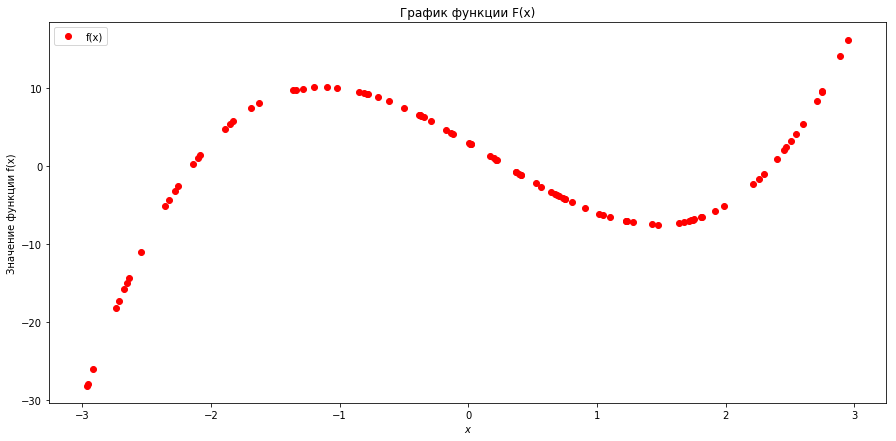

In [5]:
# Строим график функции
plt.figure (figsize=(15,7))
plt.ylabel(u'Значение функции f(x)')
plt.xlabel('$x$')
plt.title(u'График функции F(x)')
plt.plot(x_list, y_list, 'ro')# Строим график f(x)
plt.legend(['f(x)'])
plt.show()

Добавьте к значениям функции нормальный шум с нулевым матожиданием и дисперсиями из множества $\{0.1, 0.5, 1, 5\}$ (должно получиться еще 4 вектора значений функции).

In [6]:
np.random.seed(1234)
D=[0.1,0.5,1.,5.] # Массив значений дисперсии

In [7]:
shum01=sts.norm(loc=0,scale=np.sqrt(D[0]))# Генерируем шум D=0.1 и добавляем к значениям функции
y_list01=y_list+np.array(shum01.rvs(100))

In [8]:
shum05=sts.norm(loc=0,scale=np.sqrt(D[1]))# Генерируем шум D=0.5 и добавляем к значениям функции
y_list05=y_list+np.array(shum05.rvs(100))

In [9]:
shum10=sts.norm(loc=0,scale=np.sqrt(D[2]))# Генерируем шум D=1 и добавляем к значениям функции
y_list10=y_list+np.array(shum10.rvs(100))

In [10]:
shum50=sts.norm(loc=0,scale=np.sqrt(D[3]))# Генерируем шум D=5 и добавляем к значениям функции
y_list50=y_list+np.array(shum50.rvs(100))

Нарисуйте на одной картинке график функции $f(x)$ и графики с шумом (всего должно получиться пять графиков). При каком шуме график еще восстанавливается достаточно хорошо, а при каком уже плохо?

__Не забудьте подписать оси и сделать легенду (какой цвет соответствует какому графику)!__

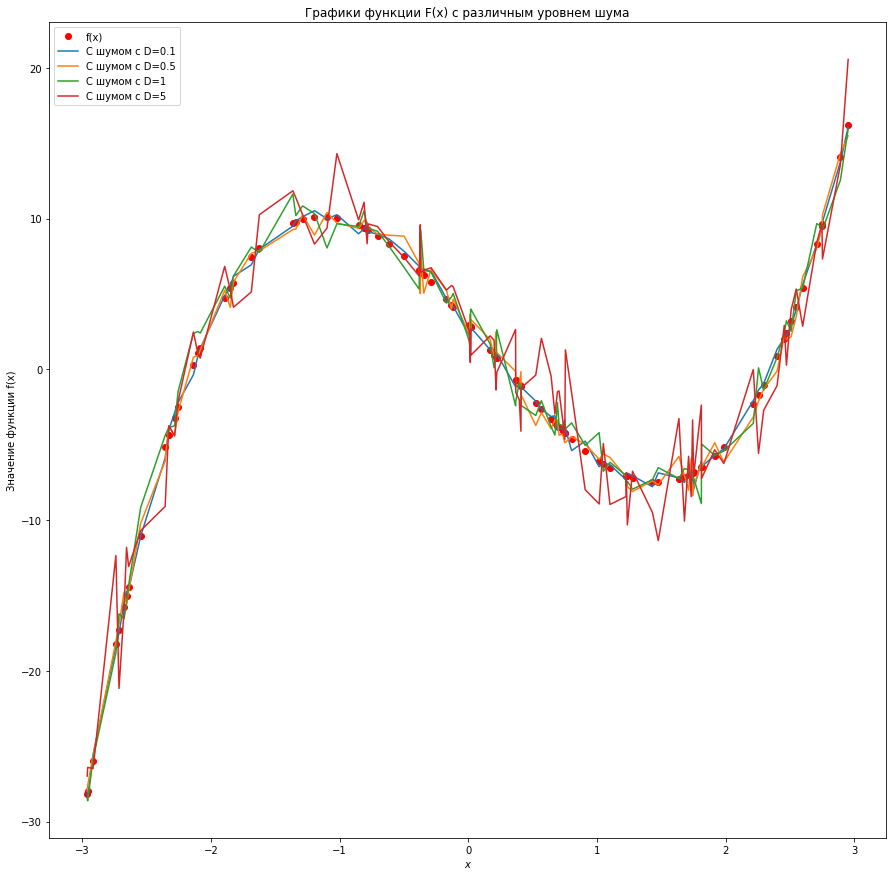

In [11]:
# Рисуем графики функции с разным шумом
plt.figure (figsize=(15,15))
plt.ylabel(u'Значение функции f(x)')
plt.xlabel('$x$')
plt.title(u'Графики функции F(x) с различным уровнем шума')
plt.plot(x_list, y_list, 'ro')# Строим график f(x)
plt.plot(x_list, y_list01)
plt.plot(x_list, y_list05)
plt.plot(x_list, y_list10)
plt.plot(x_list, y_list50)
plt.legend(['f(x)', u'С шумом с D=0.1', u'С шумом с D=0.5', u'С шумом с D=1', u'С шумом с D=5'])
plt.show()

Теперь по $x$ и значениям функции с шумом и без восстановите полином. Нужно использовать знание о том, что наша функция — полином третьей степени, то есть представьте ее в виде $w_{3}x^{3} + w_{2}x^2 + w_{1}x + w_{0}$ и минимизируйте $\sum_{x, y}(\sum_{i=0}^{3}w_{i}x^{i} - y)^{2}$ по вектору $w$.

Эту задачу можно решить с помощью __scipy.optimize.minimize__; используйте метод оптимизации __Nelder-Mead__ и количество итераций __1000__. Для этого определите функцию ошибки, в которой будет 3 аргумента — $w$, $x$ и $y$, и аргументы $x$ и $y$ передавайте в параметре __args__ функции __minimize__.

Заметьте, что при таком подходе достаточно описать минимизируемую функцию ошибки всего __один__ раз!

Для каждой восстановленной функции посчитайте среднеквадратичную ошибку $\dfrac{1}{4}\sum_{i=0}^{3}(\hat{w}_{i} - w_{i})^{2}$ коэффициентов полинома относительно точных значений, где $\hat{w}$ — полученные значения коэффициентов полинома, $w$ — настоящие. Какие получились ошибки?

# Определение коэффициентов для функции без шума

In [12]:
# Значения аргументов х, для нахождения апроксимирующей функции:
xx=np.array([x_list[0], x_list[27],x_list[65], x_list[99]])

[-2.9627489  -2.95941563 -2.9173893  -2.74005562 -2.71586833 -2.67675789
 -2.65730617 -2.64114466 -2.54771255 -2.3572391  -2.32863409 -2.28371461
 -2.2563438  -2.13739905 -2.1009977  -2.08456335 -1.8942775  -1.8508833
 -1.82594893 -1.68724737 -1.62468861 -1.36444437 -1.34121447 -1.28849424
 -1.19614977 -1.09898327 -1.02198933 -0.85309638 -0.8106841  -0.78705596
 -0.77849547 -0.70609529 -0.61678453 -0.49947877 -0.38295946 -0.37864097
 -0.37363357 -0.37014071 -0.34715547 -0.29010955 -0.17020479 -0.13143723
 -0.11784493  0.00597075  0.01535738  0.017801    0.01849899  0.16934567
  0.19986098  0.21510998  0.22126916  0.36717712  0.36859848  0.39566786
  0.40859192  0.41045769  0.5238218   0.56774868  0.64316224  0.67289398
  0.69237707  0.70465025  0.73265263  0.74950023  0.75442002  0.80235461
  0.90826886  1.01653046  1.04928566  1.10077761  1.22556583  1.22748785
  1.23598539  1.27621216  1.43113834  1.47638045  1.63695973  1.67985485
  1.7121515   1.73238086  1.7431448   1.75178481  1.

In [124]:
xx

array([-2.9627489 , -0.85309638,  0.80235461,  2.9524888 ])

In [125]:
# Значения исходной функции для взятых для эксперимента аргументов x:
yy=np.array([y_list[0], y_list[27],y_list[65], y_list[99]])

In [126]:
yy

array([-28.16370689,   9.5614686 ,  -4.63425071,  16.23273414])

In [127]:
X=np.ones((4,4))# Создаем единичную матрицу

In [128]:
# Формируем матрицу значений аргумента х в степенях1, 2 и 3
for i in range(4):
    X[i][1]=xx[i]
    X[i][2]=xx[i]**2
    X[i][3]=xx[i]**3

In [129]:
X

array([[  1.        ,  -2.9627489 ,   8.77788105, -26.00665742],
       [  1.        ,  -0.85309638,   0.72777343,  -0.62086088],
       [  1.        ,   0.80235461,   0.64377293,   0.51653418],
       [  1.        ,   2.9524888 ,   8.7171901 ,  25.7374061 ]])

In [130]:
w0=scipy.linalg.solve(X,yy)#Находим значений коэффициентов w

In [131]:
w0

array([  3., -10.,  -1.,   2.])

# Определение коэффициентов для функции с шумом с D=0.1

In [132]:
# Значения функции с шумом D=0.1 для взятых для эксперимента аргументов x:
yy01=np.array([y_list01[0], y_list01[27],y_list01[65], y_list01[99]])

In [133]:
yy01

array([-28.014626  ,   8.98687414,  -5.3933408 ,  16.07086306])

In [134]:
w01=scipy.linalg.solve(X,yy01)#Находим значений коэффициентов w

In [135]:
w01

array([  2.2742534 , -10.11200741,  -0.91772487,   2.00689145])

In [136]:
# f(x) = w[0] + w[1]*x+w[2]*x**2+w[3]*x**3
# Создаем функцию ошибки
def f(x, w):
    return w[0] + w[1]*x + w[2]*x**2 + w[3]*x**3

def MSEf(w):
    return sum((y_list - f(x_list, w))**2)
# Находим значения коэффициентов для точки минимума функции ошибки
minimize(MSEf, w01, method='Nelder-Mead')
w01opt=minimize(MSEf, w01, method='Nelder-Mead').x
w01opt

array([ 2.99999909, -9.99996744, -1.00000146,  1.99999426])

In [137]:
Y_list01=f(x_list,w01opt)# Находим значения апроксимирующей функции с оптимальными коэффициентами

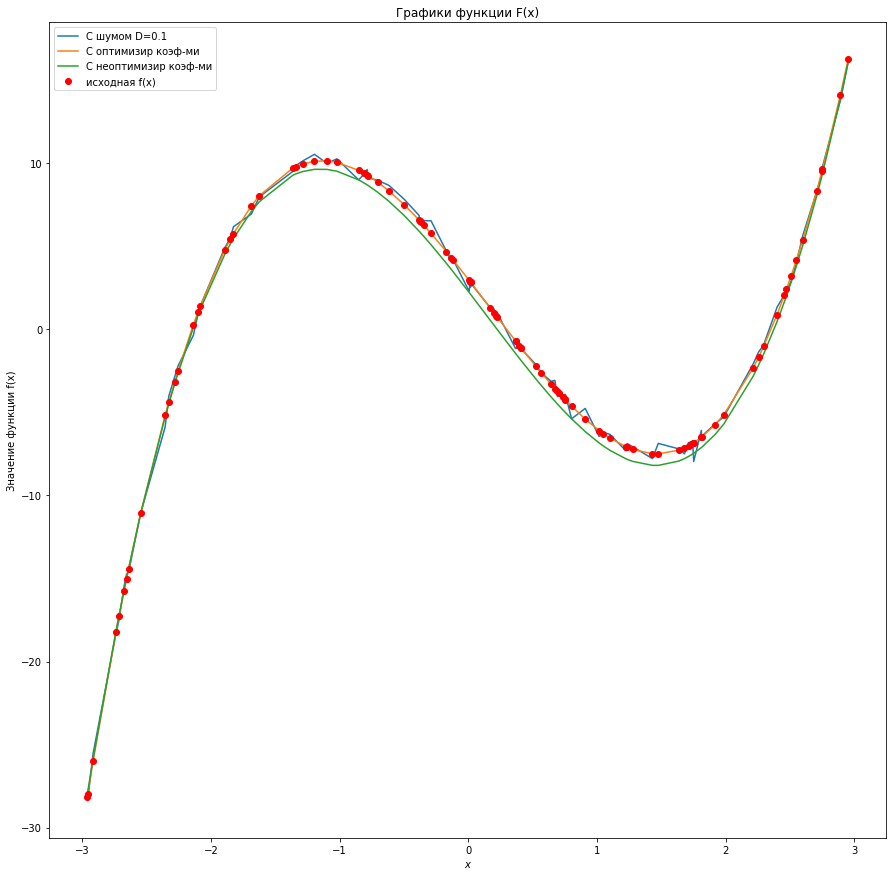

In [138]:
# Строим графики функции (исходной, с шумом и апроксимирующей)
plt.figure (figsize=(15,15))
plt.ylabel(u'Значение функции f(x)')
plt.xlabel('$x$')
plt.title(u'Графики функции F(x)')
plt.plot(x_list, y_list01)
plt.plot(x_list, Y_list01)
plt.plot(x_list, f(x_list,w01))
plt.plot(x_list, y_list, 'ro')
plt.legend([u'С шумом D=0.1', u'С оптимизир коэф-ми', u'С неоптимизир коэф-ми', u'исходная f(x)'])
plt.show()

In [139]:
# Среднеквадратичная ошибка
Mistake01=((w01opt-w0)**2).mean()

In [140]:
Mistake01

2.7405596336997474e-10

# Определение коэффициентов для функции с шумом с D=0.5

In [141]:
# Значения функции с шумом D=0.5 для аргументов x, взятых для эксперимента
yy05=np.array([y_list05[0], y_list05[27],y_list05[65], y_list05[99]])

In [142]:
yy05

array([-27.9577936 ,   9.35003216,  -4.47445484,  15.48918383])

In [143]:
w05=scipy.linalg.solve(X,yy05)#Находим значения коэффициентов w

In [144]:
w05

array([ 2.99962042, -9.7446501 , -1.03126984,  1.9524232 ])

In [145]:
# Находим оптимальные значения коэффициентов
minimize(MSEf, w01, method='Nelder-Mead')
w05opt=minimize(MSEf, w05, method='Nelder-Mead').x
w05opt

array([ 3.00003665, -9.99999741, -1.0000088 ,  1.99999957])

In [146]:
Y_list05=f(x_list,w05opt)# Находим значения апроксимирующей функции с оптимальными коэффициентами

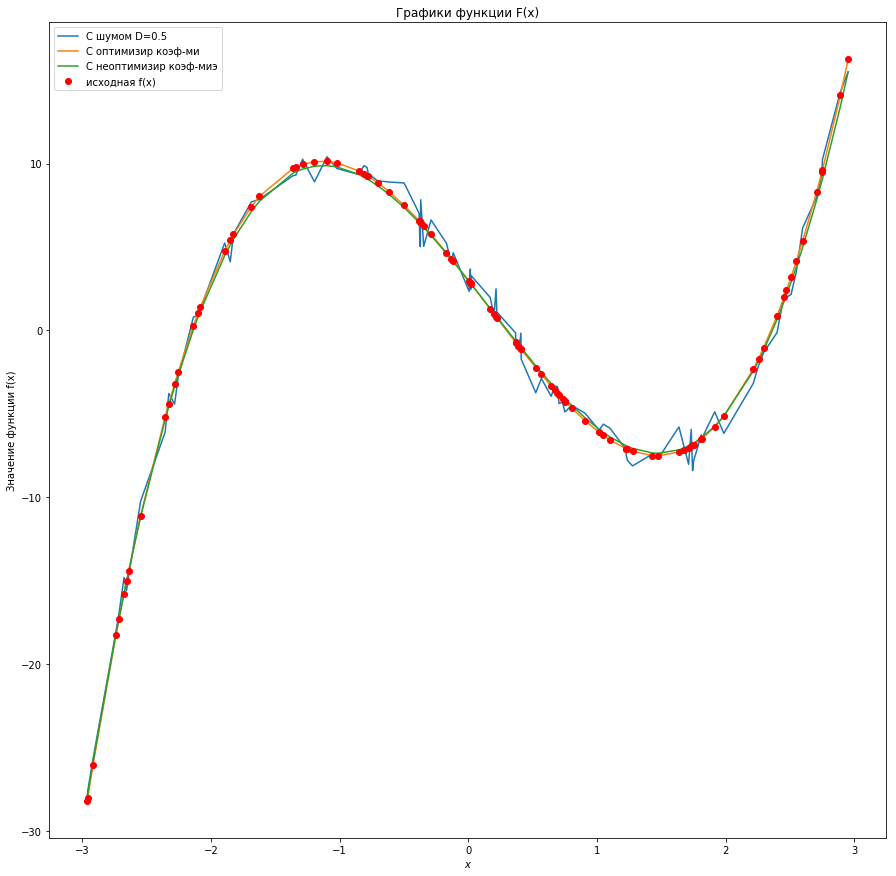

In [147]:
# Строим графики функции f(x) (исходной, с шумом, овстановленой, востановленой с оптимизироваными коэф-ми)
plt.figure (figsize=(15,15))
plt.ylabel(u'Значение функции f(x)')
plt.xlabel('$x$')
plt.title(u'Графики функции F(x)')
plt.plot(x_list, y_list05)# Строим график f(x) сшумом D=0.5
plt.plot(x_list, Y_list05)
plt.plot(x_list, f(x_list, w05))
plt.plot(x_list, y_list, 'ro')
plt.legend([u'С шумом D=0.5', u'С оптимизир коэф-ми', u'С неоптимизир коэф-миэ', u'исходная f(x)'])
plt.show()

In [148]:
# Среднеквадратичная ошибка
Mistake05=((w05opt-w0)**2).mean()

In [149]:
Mistake05

3.568681369630866e-10

# Определение коэффициентов для функции с шумом с D=1

In [150]:
# Значения функции сшумом D=1 для экспериментальных аргументов x
yy10=np.array([y_list10[0], y_list10[27],y_list10[65], y_list10[99]])

In [151]:
yy10

array([-28.48326829,   9.47436163,  -3.55771006,  15.91343634])

In [152]:
w10=scipy.linalg.solve(X,yy10)#Находим значения коэффициентов w

In [153]:
w10

array([ 3.58057346, -9.24279373, -1.10377639,  1.91332166])

In [154]:
# Находим оптимальные значения коэффициентов
minimize(MSEf, w10, method='Nelder-Mead')
w10opt=minimize(MSEf, w10, method='Nelder-Mead').x
w10opt

array([  3.00000667, -10.00003142,  -1.00000521,   2.00000561])

In [155]:
Y_list10=f(x_list,w10opt)# Находим значения апроксимирующей функции с оптимальными коэффициентами

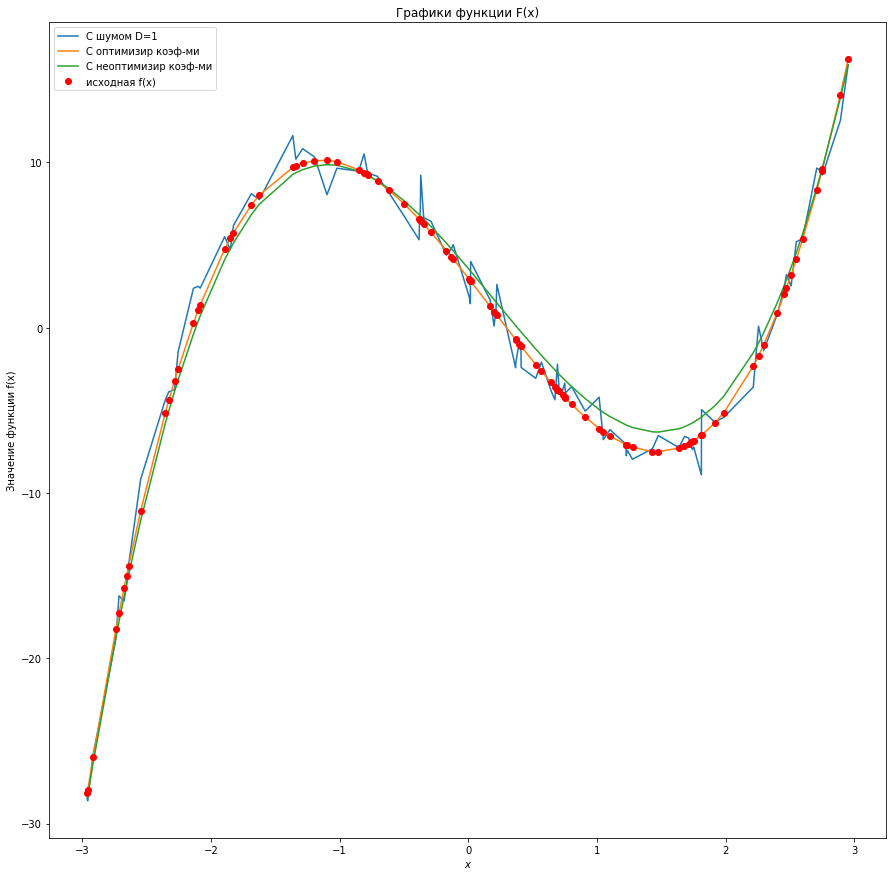

In [156]:
# Строим графики функции (исходн, с шумом, востановл, востанвол с опт коэф-ми)
plt.figure (figsize=(15,15))
plt.ylabel(u'Значение функции f(x)')
plt.xlabel('$x$')
plt.title(u'Графики функции F(x)')
plt.plot(x_list, y_list10)# Строим график f(x) сшумом D=1
plt.plot(x_list, Y_list10)
plt.plot(x_list, f(x_list, w10))
plt.plot(x_list, y_list, 'ro')
plt.legend([u'С шумом D=1', u'С оптимизир коэф-ми', u'С неоптимизир коэф-ми', u'исходная f(x)'])
plt.show()

In [157]:
# Среднеквадратичная ошибка
Mistake10=((w10-w0)**2).mean()

In [158]:
Mistake10

0.2321773870557669

# Определение коэффициентов для функции с шумом с D=50

In [159]:
# Значения функции с шумом D=5 для экспериментальных аргументов x
yy50=np.array([y_list50[0], y_list50[27],y_list50[65], y_list50[99]])

In [160]:
yy50

array([-26.98519519,   9.91012362,  -1.53672664,  20.55321587])

In [161]:
w50=scipy.linalg.solve(X,yy50)#Находим значения коэффициентов w

In [162]:
w50

array([ 4.67719869, -8.23666123, -0.87854865,  1.85928382])

In [163]:
# Определяем оптимальные коэффициенты
minimize(MSEf, w50, method='Nelder-Mead')
w50opt=minimize(MSEf, w50, method='Nelder-Mead').x
w50opt

array([  3.00000954, -10.00004998,  -0.99999506,   2.0000157 ])

In [164]:
Y_list50=f(x_list,w50opt)# Находим значения апроксимирующей функции с оптимальными коэффициентами

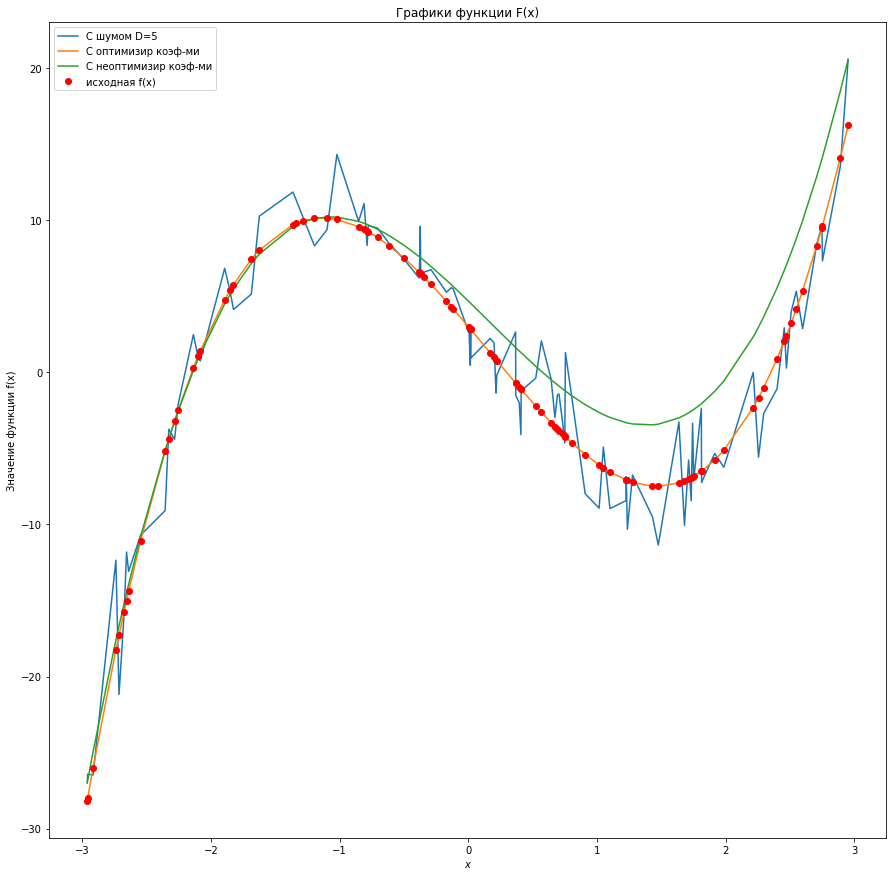

In [165]:
# Строим графики функции (исходн, с шумом, востановл, востановл с оптим коэф-ми)
plt.figure (figsize=(15,15))
plt.ylabel(u'Значение функции f(x)')
plt.xlabel('$x$')
plt.title(u'Графики функции F(x)')
plt.plot(x_list, y_list50)# Строим график f(x) сшумом D=5
plt.plot(x_list, Y_list50)
plt.plot(x_list, f(x_list, w50))
plt.plot(x_list, y_list, 'ro')
plt.legend([u'С шумом D=5', u'С оптимизир коэф-ми', u'С неоптимизир коэф-ми', u'исходная f(x)'])
plt.show()

In [166]:
# Среднеквадратичная ошибка
Mistake50=((w50-w0)**2).mean()

In [167]:
Mistake50

1.489227638727688

### Несимметричный шум

Рассмотрим несимметричный шум. Сгенерируйте шум из нормального распределения с нулевым матожиданием и дисперсией $1$. Теперь положительную часть вектора увеличьте в $5$ раз, при этом оставив отрицательную часть неизменной. Добавьте этот шум к переменной $y$.

Нарисуйте на одной картинке графики $f(x)$ с шумом и без.

In [168]:
np.random.seed(1234)
# Генерируем несимметричный шум
ns_shum=sts.norm(loc=0,scale=1).rvs(100)# Генерируем шум D=1
for i in range (100):
    if ns_shum[i]>0:
        ns_shum[i]=ns_shum[i]*5
y_ns_shum=y_list+ns_shum # Добавляем шум

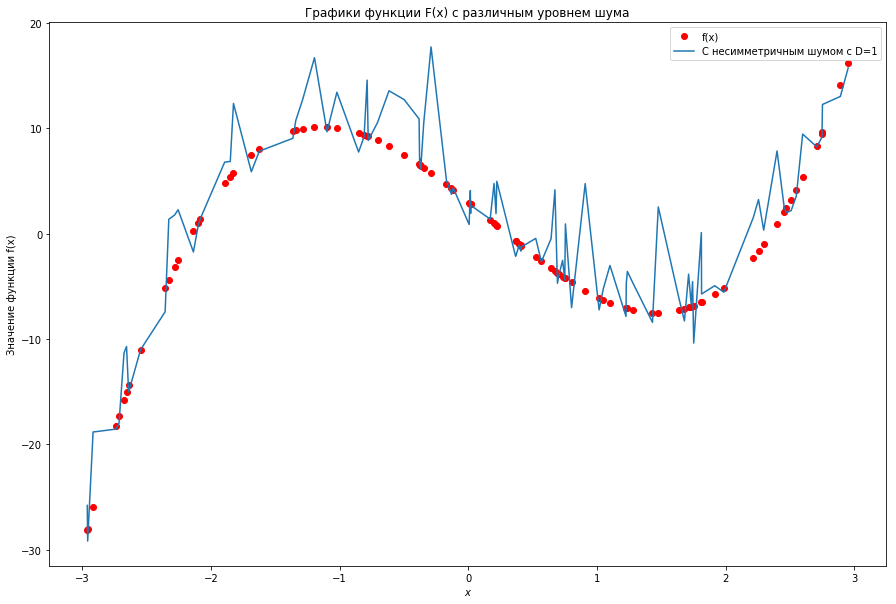

In [169]:
# Рисуем графики функции с несимметричным шумом и без
plt.figure (figsize=(15,10))
plt.ylabel(u'Значение функции f(x)')
plt.xlabel('$x$')
plt.title(u'Графики функции F(x) с различным уровнем шума')
plt.plot(x_list, y_list, 'ro')# Строим график f(x)
plt.plot(x_list, y_ns_shum)
plt.legend(['f(x)', u'С несимметричным шумом с D=1'])
plt.show()

Попробуйте восстановить коэффициенты полинома, как в предыдущей части. Какая получилась среднеквадратичная ошибка на коэффициенты? Сравните ее с ошибкой при шуме из $\mathcal{N}(0, 5)$.

In [170]:
# Значения функции с несимметричным шумом D=1 для экспериментальных аргументов x
yy_ns10=np.array([y_ns_shum[0], y_ns_shum[27],y_ns_shum[65], y_ns_shum[99]])

In [171]:
yy_ns10

array([-25.80653107,   7.74444138,  -7.03470434,  15.72085283])

In [172]:
w_ns=scipy.linalg.solve(X,yy_ns10)#Находим значения коэффициентов w

In [173]:
w_ns

array([  0.62387769, -10.320714  ,  -0.62336193,   1.98165782])

In [174]:
# Определяем оптимальные коэффициенты
minimize(MSEf, w_ns, method='Nelder-Mead')
w_ns_opt=minimize(MSEf, w_ns, method='Nelder-Mead').x
w_ns_opt

array([  2.9999538 , -10.00002994,  -0.99999372,   1.99999988])

In [175]:
Y_list_ns=f(x_list,w_ns_opt)# Находим значения апроксимирующей функции с оптимальными коэффициентами

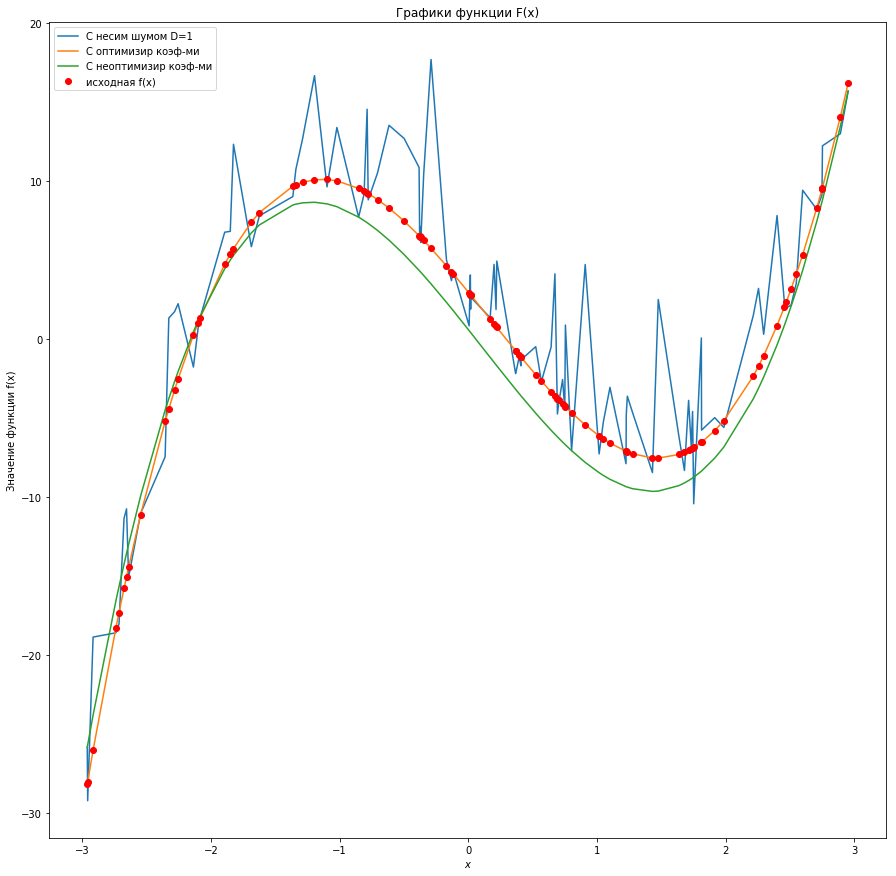

In [176]:
# Строим графики функции (исходн, с шумом, востановл, востановл с оптим коэф-ми)
plt.figure (figsize=(15,15))
plt.ylabel(u'Значение функции f(x)')
plt.xlabel('$x$')
plt.title(u'Графики функции F(x)')
plt.plot(x_list, y_ns_shum)# Строим график f(x) с несимметричным шумом D=1
plt.plot(x_list, Y_list_ns)
plt.plot(x_list, f(x_list, w_ns))
plt.plot(x_list, y_list, 'ro')
plt.legend([u'С несим шумом D=1', u'С оптимизир коэф-ми', u'С неоптимизир коэф-ми', u'исходная f(x)'])
plt.show()

In [177]:
# Среднеквадратичная ошибка
Mistake_ns=((w_ns-w0)**2).mean()

In [178]:
Mistake_ns

1.4727518411330722

### Сдвинутый шум

Теперь сгенерируйте шум из $\mathcal{N}(-5, 1)$ (конечно, это странный вид шума и на практике он встречается редко) и добавьте к значениям $y$. Нарисуйте на одной картинке графики $f(x)$ с шумом и без.

In [179]:
np.random.seed(1234)
sdv=sts.norm(loc=-2,scale=1).rvs(100)
y_list_sdv=y_list+sdv



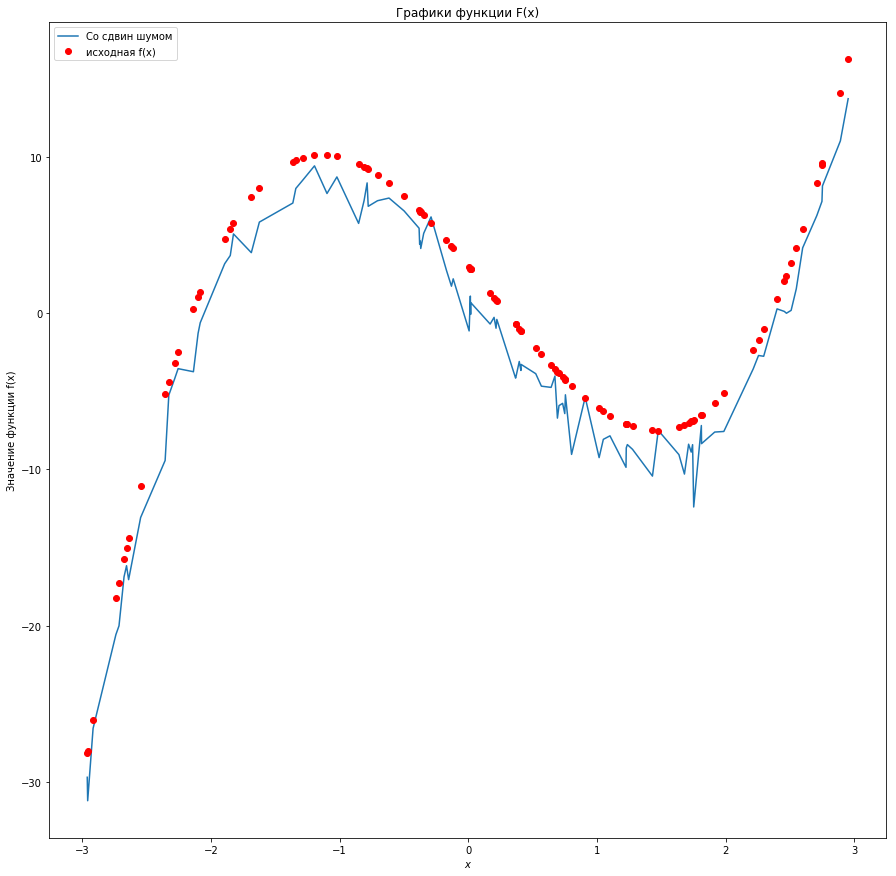

In [180]:
# Строим графики функции (исходн, с шумом)
plt.figure (figsize=(15,15))
plt.ylabel(u'Значение функции f(x)')
plt.xlabel('$x$')
plt.title(u'Графики функции F(x)')
plt.plot(x_list, y_list_sdv)# Строим график f(x) с несимметричным шумом D=1
plt.plot(x_list, y_list, 'ro')
plt.legend([u'Со сдвин шумом', u'исходная f(x)'])
plt.show()

Восстановите коэффициенты полинома, как в предыдущей части. Какая получилась среднеквадратичная ошибка на коэффициенты? Почему она такая высокая?

In [181]:
# Значения функции со сдвинутым шумом D=1 для экспериментальных аргументов x
yy_sdv10=np.array([y_list_sdv[0], y_list_sdv[27],y_list_sdv[65], y_list_sdv[99]])

In [182]:
yy_sdv10

array([-29.69227172,   5.74444138,  -9.03470434,  13.72085283])

In [183]:
w_sdv=scipy.linalg.solve(X,yy_sdv10)#Находим значения коэффициентов w

In [184]:
w_sdv

array([ -1.29501227, -10.35419854,  -0.73982318,   2.02179269])

In [185]:
# Определяем оптимальные коэффициенты
minimize(MSEf, w_sdv, method='Nelder-Mead')
w_sdv_opt=minimize(MSEf, w_sdv, method='Nelder-Mead').x
w_sdv_opt

array([  2.99998499, -10.00004912,  -0.99999635,   2.00000695])

In [186]:
Y_list_sdv=f(x_list,w_sdv_opt)# Находим значения апроксимирующей функции с оптимальными коэффициентами

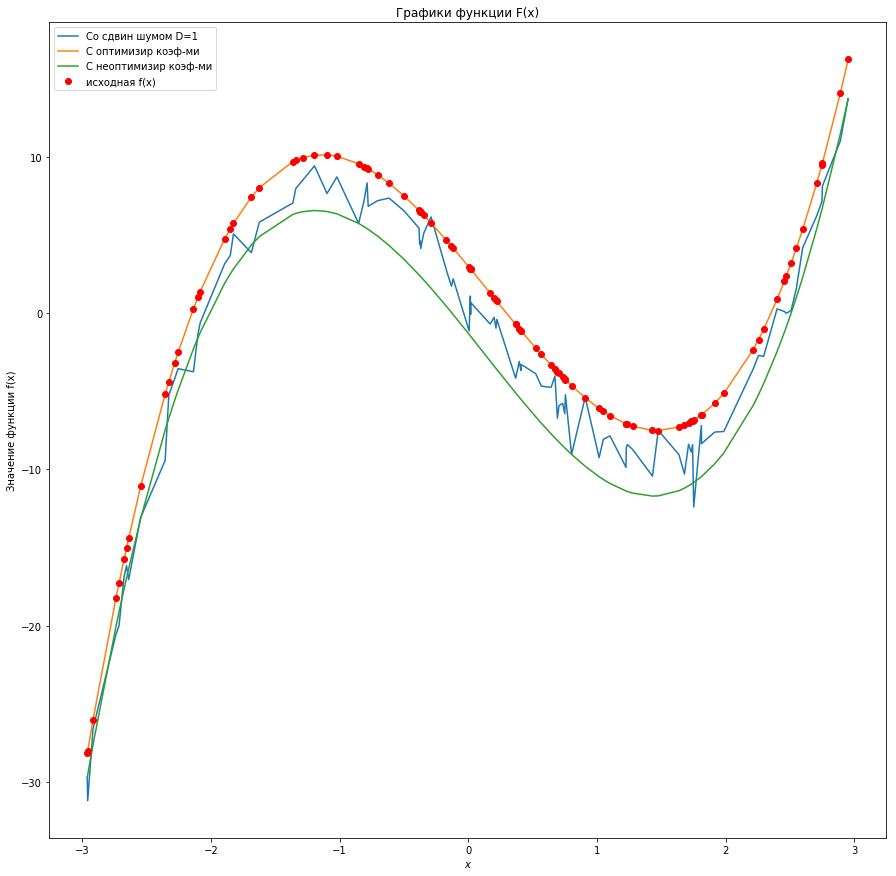

In [187]:
# Строим графики функции (исходн, с шумом, востановл, востановл с оптим коэф-ми)
plt.figure (figsize=(15,15))
plt.ylabel(u'Значение функции f(x)')
plt.xlabel('$x$')
plt.title(u'Графики функции F(x)')
plt.plot(x_list, y_list_sdv)# Строим график f(x) со сдвинутым шумом D=1
plt.plot(x_list, Y_list_sdv)
plt.plot(x_list, f(x_list, w_sdv))
plt.plot(x_list, y_list, 'ro')
plt.legend([u'Со сдвин шумом D=1', u'С оптимизир коэф-ми', u'С неоптимизир коэф-ми', u'исходная f(x)'])
plt.show()

In [188]:
# Среднеквадратичная ошибка
Mistake_sdv=((w_sdv-w0)**2).mean()

In [189]:
Mistake_sdv

4.660188466439065

In [190]:
print (u'Среднеквадратичная ошибка для шума с D=0.1:'), Mistake01
print (u'Среднеквадратичная ошибка для шума с D=0.5:'), Mistake05
print (u'Среднеквадратичная ошибка для шума с D=1:'), Mistake10
print (u'Среднеквадратичная ошибка для шума с D=5:'), Mistake50
print (u'Среднеквадратичная ошибка для несиметричного шума с D=1:'), Mistake_ns
print (u'Среднеквадратичная ошибка для сдвинутого шума с D=1:'), Mistake_sdv

Среднеквадратичная ошибка для шума с D=0.1: 2.7405596336997474e-10
Среднеквадратичная ошибка для шума с D=0.5: 3.568681369630866e-10
Среднеквадратичная ошибка для шума с D=1: 0.2321773870557669
Среднеквадратичная ошибка для шума с D=5: 1.489227638727688
Среднеквадратичная ошибка для несиметричного шума с D=1: 1.4727518411330722
Среднеквадратичная ошибка для сдвинутого шума с D=1: 4.660188466439065


# Выводы:

## - Симметричный шум:

Среднеквадратичная ошибка зависит от величины дисперсии шума. Наибольшая ошибка при наибольшей дисперсии. Что вполне логично.

## - Несимметричный шум:

Среднеквадратичная ошибка несимметричного шума с меньшей дисперсией значительно больше ошибки симметричного шума с большей дисперсией. Дополнительное влияние оказывает отклоннение значений функции из-за несиметричности.

## - Сдвинутый шум:

В данном случае искажение значений функции наибольшее, так как влияет очень большое влияние оказывает смещение матожидания шума. И как следствие наибольшая среднеквадратичная ошибка.

## Оптимизация коэффициентов полинома по минимуму функции ошибки позволяет значительно скорректировать влияние шума и получить красивую функцию для описания зависимости значений функции от аргумента.